In [1]:
import pandas as pd 

In [2]:
user_details_df = pd.read_excel('Excel.xlsx', sheet_name = 'UserDetails.csv')
cooking_df = pd.read_excel('Excel.xlsx', sheet_name = 'CookingSessions.csv')
order_df = pd.read_excel('Excel.xlsx', sheet_name = 'OrderDetails.csv')

In [3]:
# user_details_df

In [4]:
# cooking_df

In [5]:
# order_df

Mapping

* user_details_df User ID -> cooking_df User ID
* user_details_df User ID -> order_df User ID
* cooking_df Session ID -> order_df Session ID
------------------------------------------------------
### 1. User Behavior Analysis
* Average number of cooking sessions per user.
* Average orders per user and percentage of completed vs. canceled orders.

* User Engagement Levels
* Retention Analysis

In [6]:
# Average cooking sessions per user
avg_sessions_per_user = cooking_df.groupby('User ID')['Session ID'].count().mean()
avg_sessions_per_user

2.0

In [7]:
# Average orders per user
avg_orders_per_user = order_df.groupby('User ID')['Order ID'].count().mean()

# Percentage of completed vs. canceled orders
order_status_distribution = order_df['Order Status'].value_counts(normalize=True) * 100
print(f"Average orders per user: {avg_orders_per_user}")

order_status_distribution


Average orders per user: 2.0


Order Status
Completed    87.5
Canceled     12.5
Name: proportion, dtype: float64

In [8]:
# Classify users based on engagement levels
user_engagement = user_details_df[['User ID']].copy()

total_sessions = cooking_df.groupby('User ID')['Session ID'].count()
user_engagement = user_engagement.merge(total_sessions.rename('Total Sessions'), on='User ID', how='left')

user_engagement['Total Sessions'] = user_engagement['Total Sessions'].fillna(0).astype(int)

user_engagement['Engagement Level'] = pd.cut(
    user_engagement['Total Sessions'],
    bins=[0, 2, 3, float('inf')],
    labels=['Low', 'Moderate', 'High'],
    right=False
)
user_engagement

,User ID,Total Sessions,Engagement Level
0,U001,3,High
1,U002,3,High
2,U003,3,High
3,U004,2,Moderate
4,U005,2,Moderate
5,U006,1,Low
6,U007,1,Low
7,U008,1,Low
8,U009,0,Low
9,U010,0,Low


In [9]:
# Time gap between the first and last session for each user
session_dates = cooking_df.groupby('User ID')['Session Start'].agg(['min', 'max'])
session_dates['Retention Days'] = (pd.to_datetime(session_dates['max']) - pd.to_datetime(session_dates['min'])).dt.days

session_dates

,min,max,Retention Days
User ID,,,
U001,2024-12-01 19:00:00,2024-12-05 19:00:00,4
U002,2024-12-01 12:00:00,2024-12-05 07:00:00,3
U003,2024-12-02 19:30:00,2024-12-06 08:00:00,3
U004,2024-12-03 13:00:00,2024-12-06 19:00:00,3
U005,2024-12-04 18:00:00,2024-12-07 12:30:00,2
U006,2024-12-07 18:00:00,2024-12-07 18:00:00,0
U007,2024-12-08 19:30:00,2024-12-08 19:30:00,0
U008,2024-12-08 13:30:00,2024-12-08 13:30:00,0


### 2. Cooking Preferences Analysis

* Popular dishes based on cooking session counts.
* Time of day trends for cooking sessions (breakfast, lunch, dinner).
* Average session duration by meal type (e.g., breakfast sessions are shorter than dinner sessions).
* Session Ratings vs. Dishes 
* Unpopular Dishes

In [10]:
# Most cooked dishes
popular_dishes = cooking_df['Dish Name'].value_counts().head(10)

print("Top 10 most cooked dishes:")
print(popular_dishes)


Top 10 most cooked dishes:
Dish Name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


In [11]:
# Cooking session counts by meal type
meal_type_trends = cooking_df['Meal Type'].value_counts()
print("Cooking trends by meal type:")
print(meal_type_trends)


Cooking trends by meal type:
Meal Type
Dinner       8
Lunch        5
Breakfast    3
Name: count, dtype: int64


In [12]:
# Average duration per meal type
avg_duration_by_meal = cooking_df.groupby('Meal Type')['Duration (mins)'].mean()
print("Average session duration by meal type (minutes):")
print(avg_duration_by_meal)


Average session duration by meal type (minutes):
Meal Type
Breakfast    23.333333
Dinner       38.750000
Lunch        21.000000
Name: Duration (mins), dtype: float64


In [13]:
# Average session rating by dish
dish_ratings = cooking_df.groupby('Dish Name')['Session Rating'].mean()
print(dish_ratings)


Dish Name
Caesar Salad       4.366667
Grilled Chicken    4.775000
Oatmeal            4.100000
Pancakes           4.400000
Spaghetti          4.625000
Veggie Burger      4.350000
Name: Session Rating, dtype: float64


In [14]:
# Dishes with very few sessions or low ratings
unpopular_dishes = cooking_df['Dish Name'].value_counts().tail(10)
print(unpopular_dishes)


Dish Name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


### 3. Demographics

* Are certain dishes or meal types more popular in specific regions?
* How do location and age influence cooking preferences?



In [15]:
# Popular dishes by location
dishes_by_location = cooking_df.merge(user_details_df, on='User ID').groupby('Location')['Dish Name'].value_counts().head(10)
print("Regional cooking preferences:")
print(dishes_by_location)


Regional cooking preferences:
Location     Dish Name      
Austin       Grilled Chicken    1
Boston       Spaghetti          1
Chicago      Grilled Chicken    1
             Pancakes           1
             Veggie Burger      1
Los Angeles  Caesar Salad       1
             Oatmeal            1
             Spaghetti          1
Miami        Veggie Burger      1
New York     Grilled Chicken    1
Name: count, dtype: int64


In [16]:
# Top dishes segmented by age group
user_with_cooking = cooking_df.merge(user_details_df, on='User ID')
age_bins = [10, 20, 30, 40]
age_labels = ['Young Adults', 'Adults', 'Middle Aged']
user_with_cooking['Age Group'] = pd.cut(user_with_cooking['Age'], bins=age_bins, labels=age_labels)
popular_dishes_by_age = user_with_cooking.groupby('Age Group')['Dish Name'].value_counts().head(10)
print(popular_dishes_by_age)


Age Group     Dish Name      
Young Adults  Caesar Salad       0
              Grilled Chicken    0
              Oatmeal            0
              Pancakes           0
              Spaghetti          0
              Veggie Burger      0
Adults        Grilled Chicken    3
              Caesar Salad       2
              Spaghetti          2
              Pancakes           1
Name: count, dtype: int64


/tmp/ipykernel_2427573/1062323475.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popular_dishes_by_age = user_with_cooking.groupby('Age Group')['Dish Name'].value_counts().head(10)


### 4. Order Trends Analysis

* Most ordered dishes and their success rates (Order Status).
* Revenue trends: Average amount spent per order, top-spending users.

* Time Between Orders
* Canceled Orders Analysis

In [17]:
# Most ordered dishes
popular_ordered_dishes = order_df['Dish Name'].value_counts().head(10)
print("Top 10 most ordered dishes:")
popular_ordered_dishes


Top 10 most ordered dishes:


Dish Name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64

In [18]:
# if all dishes were ordered equal number of times, how would each dish be rated.
most_rated = order_df.groupby('Dish Name')['Rating'].mean()
most_rated


Dish Name
Caesar Salad       4.000000
Grilled Chicken    4.666667
Oatmeal            4.000000
Pancakes           4.000000
Spaghetti          4.500000
Veggie Burger      4.000000
Name: Rating, dtype: float64

In [19]:
# Average amount spent per order
avg_order_amount = order_df['Amount (USD)'].mean()
print(f"Average order amount: ${avg_order_amount:.2f}")


Average order amount: $11.25


In [20]:
# Time between orders for each user
order_df['Order Date'] = pd.to_datetime(order_df['Order Date'])
order_gap = order_df.sort_values(['User ID', 'Order Date']).groupby('User ID')['Order Date'].diff().dt.days
print(order_gap.describe())  # Average, median, etc.


count    8.000000
mean     2.250000
std      0.707107
min      1.000000
25%      2.000000
50%      2.000000
75%      3.000000
max      3.000000
Name: Order Date, dtype: float64


In [21]:
# Analyze canceled orders by dish and meal type
canceled_orders = order_df[order_df['Order Status'] == 'Canceled']
canceled_trends = canceled_orders.groupby(['Dish Name', 'Meal Type']).size().sort_values(ascending=False)
print(canceled_trends)


Dish Name        Meal Type
Grilled Chicken  Dinner       1
Veggie Burger    Lunch        1
dtype: int64


### 5. Revenue and Business Growth
* Lifetime Value of Users
* Revenue Growth by Registration Month
* High Value users
* Dish-Specific Revenue
* Revenue Distribution by Region

In [22]:
# Total revenue generated by each user
user_revenue = order_df.groupby('User ID')['Amount (USD)'].sum()
print(user_revenue)


User ID
U001    35.0
U002    31.0
U003    32.0
U004    21.5
U005    22.5
U006    13.0
U007    14.0
U008    11.0
Name: Amount (USD), dtype: float64


In [23]:
# Revenue by registration month
user_details_df['Registration Date'] = pd.to_datetime(user_details_df['Registration Date'])
user_details_df['Registration Month'] = user_details_df['Registration Date'].dt.to_period('M')
revenue_by_month = user_details_df.merge(order_df, on='User ID').groupby('Registration Month')['Amount (USD)'].sum()
print(revenue_by_month)


Registration Month
2023-01    35.0
2023-02    31.0
2023-03    32.0
2023-04    21.5
2023-05    22.5
2023-06    13.0
2023-07    14.0
2023-08    11.0
Freq: M, Name: Amount (USD), dtype: float64


In [24]:
# Top 20% of users by revenue
high_value_users = user_revenue[user_revenue >= user_revenue.quantile(0.80)]
print(high_value_users)


User ID
U001    35.0
U003    32.0
Name: Amount (USD), dtype: float64


In [25]:
# Total revenue per dish
dish_revenue = order_df.groupby('Dish Name')['Amount (USD)'].sum()
print(dish_revenue)


Dish Name
Caesar Salad       28.0
Grilled Chicken    51.0
Oatmeal             7.0
Pancakes           16.5
Spaghetti          55.5
Veggie Burger      22.0
Name: Amount (USD), dtype: float64


In [26]:
# Revenue by region
revenue_by_region = order_df.merge(user_details_df, on='User ID').groupby('Location')['Amount (USD)'].sum()
print(revenue_by_region)

Location
Austin           13.0
Boston           14.0
Chicago          32.0
Los Angeles      31.0
Miami            11.0
New York         35.0
San Francisco    21.5
Seattle          22.5
Name: Amount (USD), dtype: float64


### Vizualisation 

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


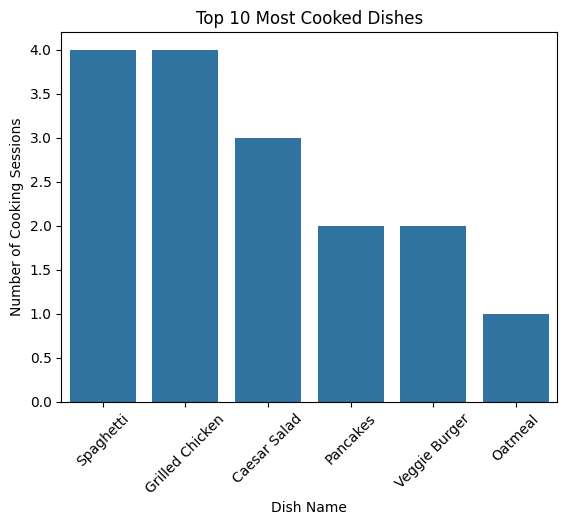

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Bar chart for most cooked dishes
sns.barplot(x=popular_dishes.index, y=popular_dishes.values)
plt.title("Top 10 Most Cooked Dishes")
plt.ylabel("Number of Cooking Sessions")
plt.xlabel("Dish Name")
plt.xticks(rotation=45)
plt.show()
